<a href="https://colab.research.google.com/github/chineidu/NLP-Tutorial/blob/main/notebook/03_tensorflow/03_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification With TensorFlow

Types of Classification
1. Binary
2. Multiclass
3. Multilabel


In [1]:
# Standard imports
from typing import List, Tuple, Dict, Optional
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

### Create Data For Classification

* Using scikit-learn

In [2]:
from sklearn.datasets import make_circles

RANDOM_STATE = 1
SEED = 2
NOISE = 0.05
N_SAMPLES = 2_000

X, y = make_circles(N_SAMPLES, noise=NOISE, random_state=RANDOM_STATE)

X.shape, y. shape

((2000, 2), (2000,))

In [3]:
# Preview the data
X[:4], y[:4]

(array([[-0.54830966, -0.90374793],
        [-0.287522  , -0.70272049],
        [-0.19083057,  0.83641477],
        [-0.29472923,  0.72388715]]), array([0, 1, 1, 1]))

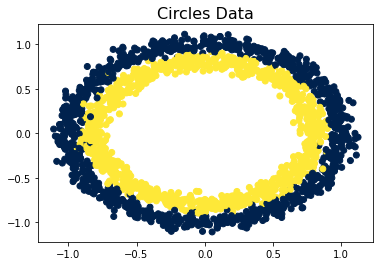

In [4]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cividis)
plt.title("Circles Data", size=16)
plt.show()

### Build A Classification Model (NN)

* using a single layer with 10 neurons.
* classification loss = **binary_crossentropy**
* classification metrics = **accuracy**
* Epochs = 50

In [5]:
# Build a model
tf.random.set_seed(SEED)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[X.shape[-1]])
])

# Compile
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_1 = model_1.fit(X, y, epochs=50)

Epoch 1/50
63/63 [==============================] - 2s 9ms/step - loss: 4.2759 - accuracy: 0.0340
Epoch 2/50
63/63 [==============================] - 0s 6ms/step - loss: 4.1486 - accuracy: 0.0400
Epoch 3/50
63/63 [==============================] - 0s 6ms/step - loss: 4.0330 - accuracy: 0.0400
Epoch 4/50
63/63 [==============================] - 0s 6ms/step - loss: 3.9226 - accuracy: 0.0315
Epoch 5/50
63/63 [==============================] - 0s 7ms/step - loss: 3.8167 - accuracy: 0.0245
Epoch 6/50
63/63 [==============================] - 1s 10ms/step - loss: 3.7130 - accuracy: 0.0150
Epoch 7/50
63/63 [==============================] - 0s 6ms/step - loss: 3.5895 - accuracy: 0.0010
Epoch 8/50
63/63 [==============================] - 0s 4ms/step - loss: 3.4204 - accuracy: 0.0000e+00
Epoch 9/50
63/63 [==============================] - 0s 3ms/step - loss: 3.1184 - accuracy: 0.0000e+00
Epoch 10/50
63/63 [==============================] - 0s 3ms/step - loss: 2.7433 - accuracy: 0.0000e+00
Epoch 

In [6]:
# Evaluate
model_1.evaluate(X, y)

63/63 [==============================] - 1s 3ms/step - loss: 0.7533 - accuracy: 0.0500


[0.753339409828186, 0.05000000074505806]

### Comment

* The model's performance is very poor!
* What might be the cause of the poor performance??
* Maybe I should add an extra layer 🤔

In [7]:
# Build
tf.random.set_seed(SEED)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, input_shape=[X.shape[-1]]),
    tf.keras.layers.Dense(units=1)
])

# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit 
model_2.fit(X, y, epochs=50)

Epoch 1/50
63/63 [==============================] - 3s 8ms/step - loss: 1.4619 - accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 0s 6ms/step - loss: 0.7237 - accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4940
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5040
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4705
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4800
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4395
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5140
Epoch 11/50
63/63 [

### Comment:

* The model still has a very poor performance!
* Let's visualize the model's predictions.

In [8]:
def plot_decision_boundary(model, X:np.ndarray, y:np.ndarray) -> "Plot":
  """ This is used to plots the decision boundary created by a model 
  predicting on X. This function has been adapted from two phenomenal 
  resources:
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
  2. (Made with ML basics - https://github.com/GokuMohandas/MadeWithML/"
  "blob/main/notebooks/08_Neural_Networks.ipynb")
  """
  # Define the axis boundaries of the plot and create a meshgrid
  # The numpy.meshgrid function is used to create a rectangular grid out of two 
  # given one-dimensional arrays representing the Cartesian indexing or Matrix 
  # indexing. Meshgrid function is somewhat inspired from MATLAB.
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


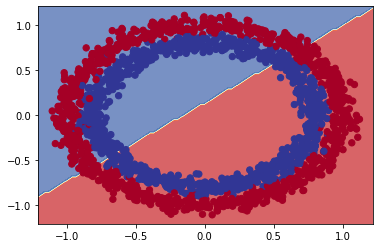

In [9]:
plot_decision_boundary(model_2, X, y)

### Improve The Model

* Add **non-linear** `activation` functions.


### You can checkout [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.98779&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [10]:
# Build
tf.random.set_seed(SEED)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="ReLU", 
                          input_shape=[X.shape[-1]], name="input_layer"),
    tf.keras.layers.Dense(units=5, activation="ReLU", name="hidden_layer_1"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")
])

# Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 15        
                                                                 
 hidden_layer_1 (Dense)      (None, 5)                 30        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit
history_3 = model_3.fit(X, y, epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4910
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5030
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5005
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5075
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5160
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5215
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5135
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5275
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5190
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5435
Epoch 11/

In [12]:
# Evaluate
model_3.evaluate(X, y)

63/63 [==============================] - 0s 3ms/step - loss: 0.1100 - accuracy: 0.9690


[0.10997582226991653, 0.968999981880188]

### Split The Data

* Split it into training and validation sets.

In [13]:
RATIO = 1_600
X_train, y_train = X[:RATIO], y[:RATIO]
X_val, y_val = X[RATIO:], y[RATIO:]

X_train.shape, X_val.shape 

((1600, 2), (400, 2))

In [14]:
# Rebuild model_3
tf.random.set_seed(SEED)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="ReLU", 
                          input_shape=[X_train.shape[-1]], name="input_layer"),
    tf.keras.layers.Dense(units=5, activation="ReLU", name="hidden_layer"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", 
                          name="output_layer") # units=1 (since the output is binary)
])

# Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Summary
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 15        
                                                                 
 hidden_layer (Dense)        (None, 5)                 30        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Fit
history_3 = model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
50/50 [==============================] - 1s 3ms/step - loss: 0.6996 - accuracy: 0.4875
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4875
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4950
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4800
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.4938
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5013
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5063
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5094
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5119
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5188
Epoch 11/

In [16]:
# Evaluate
model_3.evaluate(X_val, y_val)

13/13 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9275


[0.21133247017860413, 0.9275000095367432]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


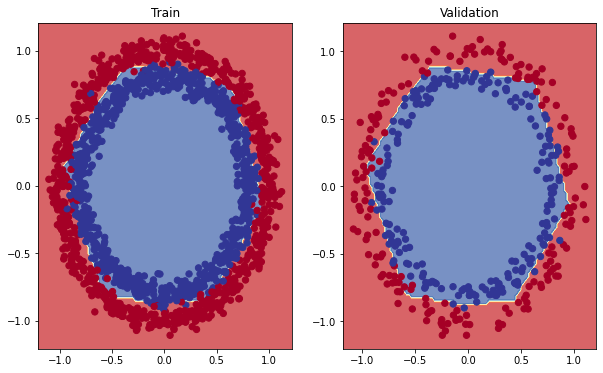

In [17]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_3, X_train, y_train)
plt.title("Train")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_3, X_val, y_val)
plt.title("Validation")

plt.show()

### Implement Some Activation Functions

1. Linear function. 

$$linear(x) = x $$

2. Sigmoid function.

$$\sigma(x) = \frac{1}{1 + e^{(-x)}} $$

3. ReLU (Rectified Linear Unit) function.

$$relu(x) = max{(0, x)}$$

4. Tanh function. 

$$tanh(x) = \frac{(e^{x} - e^{-x})}{(e^{x} + e^{-x})} $$

In [18]:
def linear_function(X: np.ndarray) -> np.ndarray:
  """This applies a linear function to the input array.
  i.e it returns an unmodified input."""
  return X


def sigmoid_activation(X: np.ndarray) -> np.ndarray:
  """This applies the sigmoid activation function to the input array.
  It returns values between 0 and 1.
  """
  return np.divide(1, (1 + np.exp(-X)))


def ReLU_activation(X: np.ndarray) -> np.ndarray:
  """This applies the sigmoid activation function to the input array.
  i.e it returns values between 0 and the max. positive number.
  """
  return np.array([max(0, x_) for x_ in X])


def tanh_activation(X: np.ndarray) -> np.ndarray:
  """This applies the tanh activation function to the input array.
  """
  numerator = (np.exp(X) - np.exp(-X))
  denominator = (np.exp(X) + np.exp(-X))
  return np.divide(numerator, denominator)

def linear_plot(X: np.ndarray, title: str="") -> "Plot":
  """This returns the linear plot."""
  plt.plot(X)
  plt.title(f"{title}", size=15)
  plt.show()

In [19]:
A = np.arange(-10, 10)

A

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

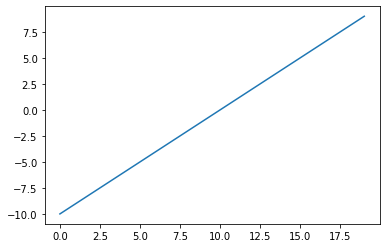

In [20]:
linear_plot(A)

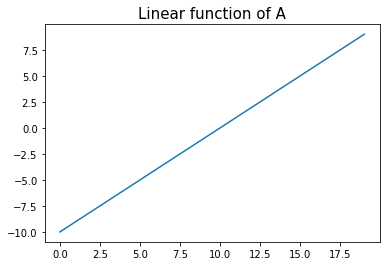

In [21]:
linear_plot(linear_function(A), title="Linear function of A")

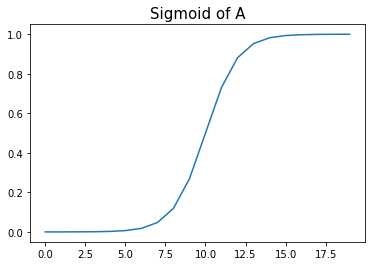

In [22]:
sigmoid_A = sigmoid_activation(A)
linear_plot(sigmoid_A, title="Sigmoid of A")

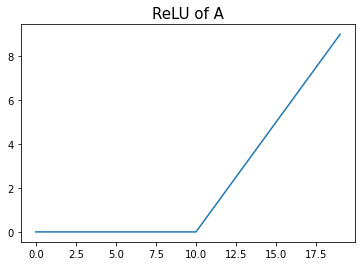

In [23]:
relu_A = ReLU_activation(A)
linear_plot(relu_A, title="ReLU of A")

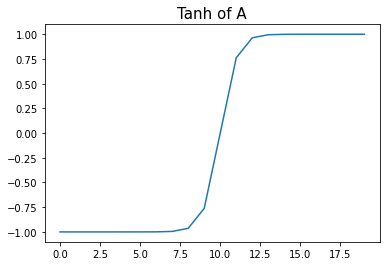

In [24]:
tanh_A = tanh_activation(A)
linear_plot(tanh_A, title="Tanh of A")

### Build Another Model With A Higher Learning Rate

* e.g. learning_rate=0.01

In [25]:
# Build
tf.random.set_seed(SEED)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="relu", 
                          input_shape=[X_train.shape[-1]]),
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit
history_4 = model_4.fit(X_train, y_train, epochs=70)



Epoch 1/70
50/50 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5106
Epoch 2/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5663
Epoch 3/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6438
Epoch 4/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.6844
Epoch 5/70
50/50 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7475
Epoch 6/70
50/50 [==============================] - 0s 3ms/step - loss: 0.4384 - accuracy: 0.8244
Epoch 7/70
50/50 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8775
Epoch 8/70
50/50 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.9025
Epoch 9/70
50/50 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.9244
Epoch 10/70
50/50 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.9150
Epoch 11/70
50/50 [

In [26]:
# Evaluate
model_4.evaluate(X_val, y_val)

13/13 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9200


[0.19468820095062256, 0.9200000166893005]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


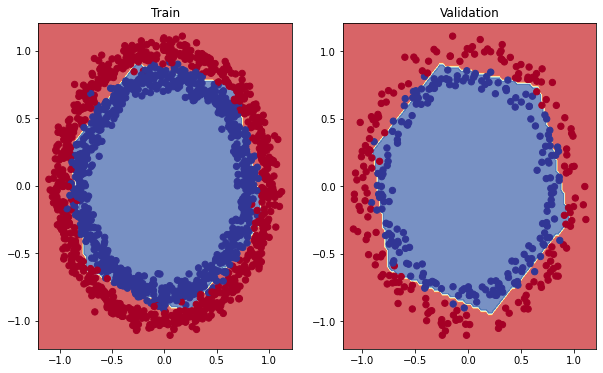

In [27]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_4, X_train, y_train)
plt.title("Train")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_4, X_val, y_val)
plt.title("Validation")

plt.show()

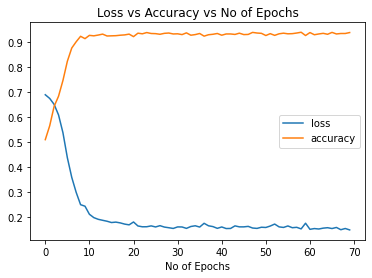

In [29]:
pd.DataFrame(history_4.history).plot()
plt.xlabel("No of Epochs")
plt.title("Loss vs Accuracy vs No of Epochs")
plt.show()

### Finding The Best Learning

* Using `learning rate callback`

In [39]:
from keras.api._v2.keras import callbacks
# Build
tf.random.set_seed(SEED)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation="relu", input_shape=[X_train.shape[-1]]),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Use a learning rate callback
lr_scheduler = (
    tf.keras.callbacks
    .LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))
    )

# Fit 
history_5 = model_5.fit(X_train, y_train, epochs=70, callbacks=[lr_scheduler])

Epoch 1/70
50/50 [==============================] - 2s 4ms/step - loss: 0.7102 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/70
50/50 [==============================] - 0s 4ms/step - loss: 0.7085 - accuracy: 0.5044 - lr: 1.1220e-04
Epoch 3/70
50/50 [==============================] - 0s 10ms/step - loss: 0.7067 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/70
50/50 [==============================] - 0s 5ms/step - loss: 0.7052 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/70
50/50 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.5006 - lr: 1.5849e-04
Epoch 6/70
50/50 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.4956 - lr: 1.7783e-04
Epoch 7/70
50/50 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.4956 - lr: 2.2387e-04
Epoch 9/70
50/50 [==============================] - 0s 2ms/step - loss: 0.6982 

<Figure size 648x504 with 0 Axes>

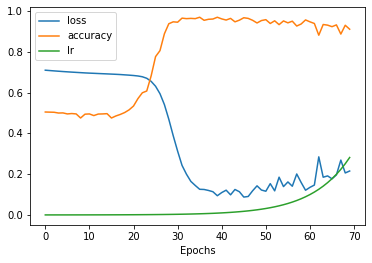

In [42]:
plt.figure(figsize=(9, 7))
pd.DataFrame(history_5.history).plot()
plt.xlabel("Epochs")
plt.show()

In [44]:
epochs = 70
learning_rates = 1e-4 * (10 ** (np.arange(epochs) / 20))
learning_rates

array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.46683592e-02, 5.01187234e-02, 5.62341325e-02,
      

In [53]:
# Slice the list
history_5.history.get("loss")[:4]

[0.7101752758026123,
 0.7084596753120422,
 0.7067406177520752,
 0.7051571011543274]

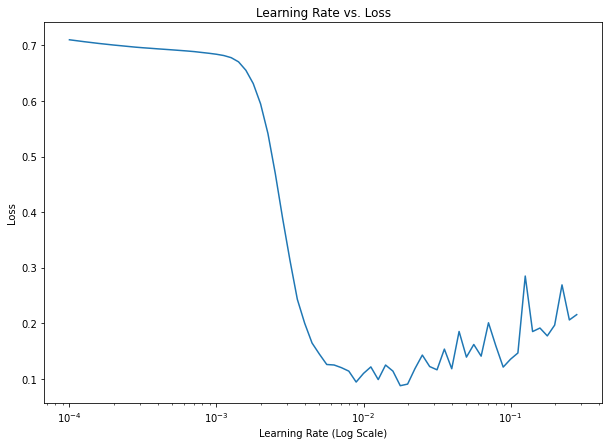

In [54]:
plt.figure(figsize=(10, 7))

# Make a plot with log scaling on the x axis
plt.semilogx(learning_rates, history_5.history.get("loss"))
plt.xlabel("Learning Rate (Log Scale)")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")
plt.show()

In [27]:
# Comment:
# The ideal learning rate from the plot above is the point/region where the 
# loss is decreasing the most. i.e btween 1e-2 and 2e-2 (0.01 and 0.02)

### Rebuild The Model

In [60]:
# Build
tf.random.set_seed(SEED)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation="relu", 
                          input_shape=[X_train.shape[-1]]),
    tf.keras.layers.Dense(units=5, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# Fit
history_6 = model_6.fit(X_train, y_train, epochs=50)

Epoch 1/50
50/50 [==============================] - 2s 2ms/step - loss: 0.6941 - accuracy: 0.5081
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5781
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6837
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.7656
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8831
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.9369
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9544
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9475
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.9556
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 0.9594
Epoch 11/50
50/50 [

In [61]:
# Evaluate
model_6.evaluate(X_val, y_val)

13/13 [==============================] - 0s 3ms/step - loss: 0.1229 - accuracy: 0.9600


[0.12290509045124054, 0.9599999785423279]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


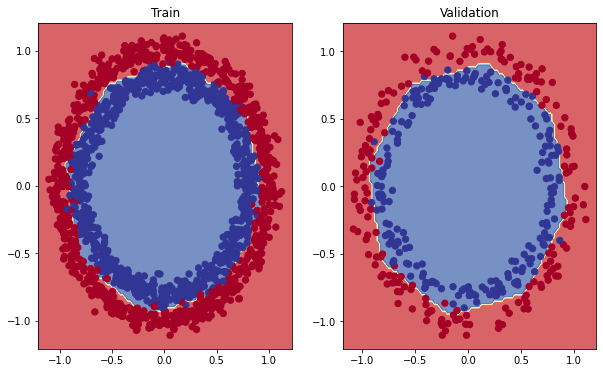

In [62]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_6, X_train, y_train)
plt.title("Train")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_6, X_val, y_val)
plt.title("Validation")

plt.show()